In [1]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import math
import glob
import shutil

(160, 320)


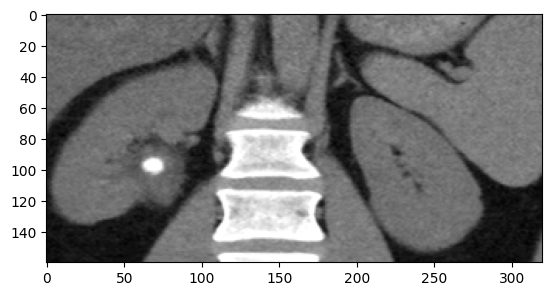

In [2]:

import matplotlib.pyplot as plt
import os
import cv2

source_images_folder = os.path.join('.','Dataset',"Train") # the folder containing all the images for ROI selection
image_names = os.listdir(source_images_folder)
labels = os.listdir(os.path.join('.','Dataset',"Train"))
destination_folder = os.path.join('.','Dataset', "cropped_images") # the folder to which the cropped images are stored
images_dir = []
for label in labels:
    temp_dir = os.path.join(source_images_folder,label)
    temp_img = glob.glob(temp_dir + '/*.png')

    images_dir =  images_dir  + temp_img


reader = Image.open(images_dir[0]).resize([640,640])
reader = reader.crop((190, 120, 510, 280))
alx = plt.imshow(reader, cmap="gray")

# alx = plt.imshow(reader, cmap="gray")
print(alx.get_size())

# for image in images_dir:
#     img = cv2.imread(image)
#     plt.figure(figsize=(5,5))
#     fig = plt.gcf()
#     plt.imshow(img[240:600,280:820])  # The ROI, please keep static
#     plt.draw()
#     if not os.path.exists(os.path.join(destination_folder)):
#       os.mkdir(os.path.join(destination_folder))
    
#     plt.savefig(os.path.join(destination_folder,'holla.png'))
#     print('saved ', image)
#     break

In [3]:
os.listdir(source_images_folder)

['Kidney_stone', 'Normal']

In [39]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=100,
                                               directory=source_images_folder,
                                               shuffle=False,
                                               target_size=(640,640),
                                               class_mode='binary')

Found 1453 images belonging to 2 classes.


1
1
2
2
3
3
4
4
5
5


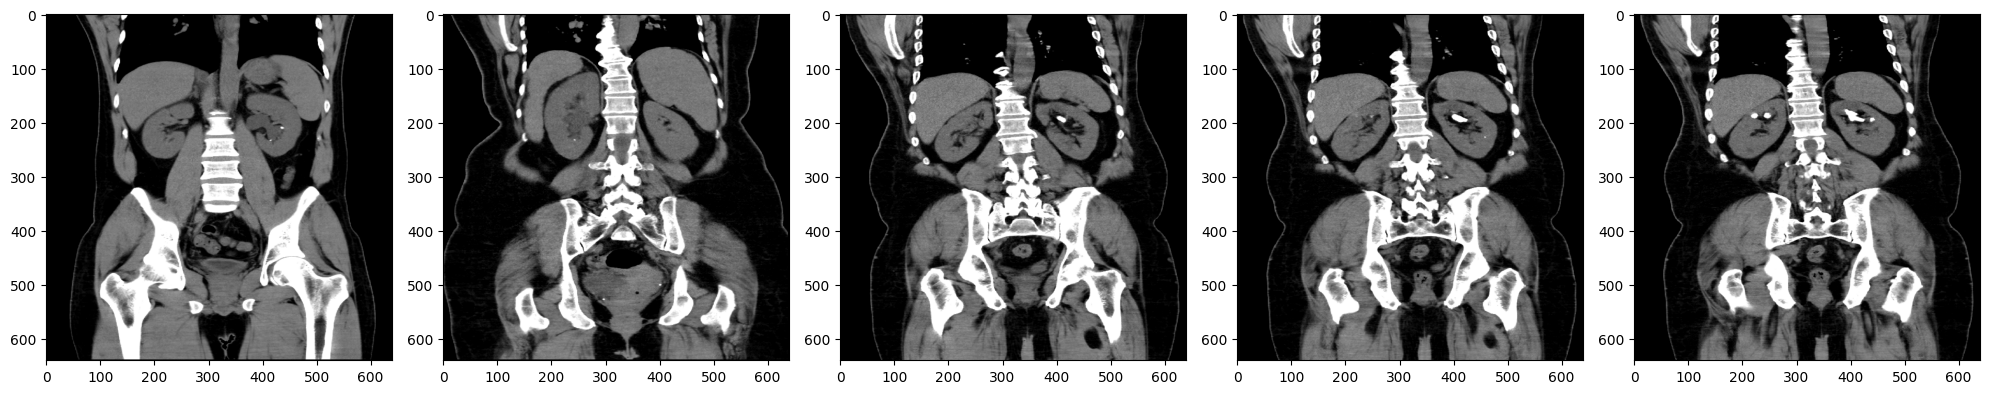

In [47]:
y_train = []
x_train = []
for batch in train_data_gen:
    no_of_image = len(batch[1])

    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    
    for i in range(5):#range(no_of_image):
        y_train.append(batch[1][i])
        axes[i].imshow(batch[0][i])#[120:280,190:510])
        x_train.append(batch[0][i])
        print(len(y_train))
        print(len(x_train))
    plt.tight_layout()
    plt.show()
        
    break